In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv(r'C:\Users\user\Desktop\wine\datasets\2017PurchasePricesDec.csv')
df = pd.read_csv(r'C:\Users\user\Desktop\wine\datasets\BegInvFINAL12312016.csv')
df = pd.read_csv(r'C:\Users\user\Desktop\wine\datasets\EndInvFINAL12312016.csv')
df = pd.read_csv(r'C:\Users\user\Desktop\wine\datasets\InvoicePurchases12312016.csv')
df = pd.read_csv(r'C:\Users\user\Desktop\wine\datasets\PurchasesFINAL12312016.csv')
df = pd.read_csv(r'C:\Users\user\Desktop\wine\datasets\SalesFINAL12312016.csv')

# Quick overview
print(df.info())
print(df.head())

# Nulls and value counts
print(df.isnull().sum())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB
None
           InventoryId  Store  Brand                 Description  

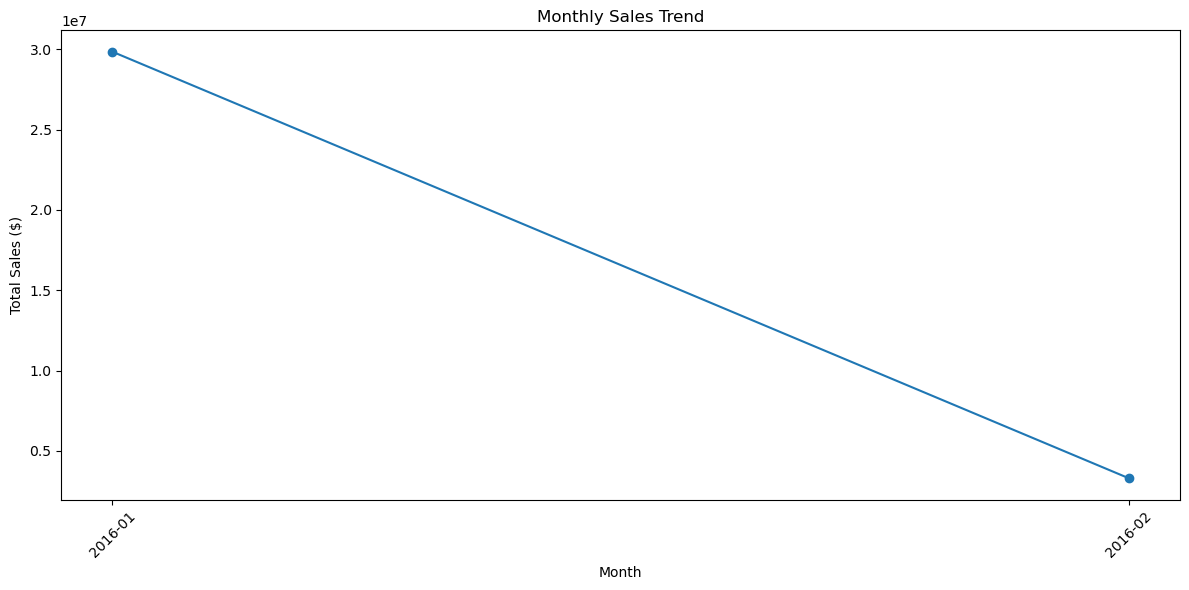

In [9]:
# Assign df to sales (if df is your sales dataset)
sales = df.copy()

# Convert SalesDate to datetime
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])

# Add Year-Month column
sales['YearMonth'] = sales['SalesDate'].dt.to_period('M')

# Monthly Sales Trend
monthly_sales = sales.groupby('YearMonth').agg({
    'SalesDollars': 'sum',
    'SalesQuantity': 'sum'
}).reset_index()

# Plot (optional if you're using Jupyter/Matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['SalesDollars'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [15]:
top_products = sales.groupby(['YearMonth', 'Description']).agg({
    'SalesQuantity': 'sum',
    'SalesDollars': 'sum'
}).reset_index()

# Sort and get top 5 for each month
top5_each_month = top_products.sort_values(['YearMonth', 'SalesDollars'], ascending=[True, False]) \
                              .groupby('YearMonth').head(5)

print(top5_each_month.head(10))  # Preview


      YearMonth              Description  SalesQuantity  SalesDollars
1116    2016-01   Capt Morgan Spiced Rum          31942     542732.58
3300    2016-01  Jack Daniels No 7 Black          21004     491838.96
3602    2016-01          Ketel One Vodka          14618     389819.22
6303    2016-01    Tito's Handmade Vodka          17825     378656.25
3382    2016-01    Jameson Irish Whiskey          15206     370715.94
7530    2016-02   Capt Morgan Spiced Rum           3924      67275.76
8706    2016-02  Jack Daniels No 7 Black           2793      66225.07
6853    2016-02         Absolut 80 Proof           2889      53653.11
10395   2016-02    Tito's Handmade Vodka           2300      41530.00
7062    2016-02      Baileys Irish Cream           2409      40921.91


In [17]:
# Total sales per product
product_sales = sales.groupby('Description').agg({
    'SalesDollars': 'sum'
}).sort_values(by='SalesDollars', ascending=False).reset_index()

# Calculate cumulative contribution
product_sales['CumulativePercent'] = 100 * product_sales['SalesDollars'].cumsum() / product_sales['SalesDollars'].sum()

# Assign ABC class
def classify(row):
    if row['CumulativePercent'] <= 70:
        return 'A'
    elif row['CumulativePercent'] <= 90:
        return 'B'
    else:
        return 'C'

product_sales['ABC_Class'] = product_sales.apply(classify, axis=1)

print(product_sales.head(10))  # Preview ABC classification


               Description  SalesDollars  CumulativePercent ABC_Class
0   Capt Morgan Spiced Rum     610008.34           1.840736         A
1  Jack Daniels No 7 Black     558064.03           3.524727         A
2         Absolut 80 Proof     422095.29           4.798424         A
3    Tito's Handmade Vodka     420186.25           6.066360         A
4          Ketel One Vodka     417950.59           7.327551         A
5    Jameson Irish Whiskey     410287.84           8.565618         A
6         Grey Goose Vodka     394280.19           9.755382         A
7      Baileys Irish Cream     294738.43          10.644772         A
8                   Kahlua     290933.11          11.522680         A
9                 Jim Beam     255837.61          12.294685         A


In [19]:
top_qty_products = sales.groupby('Description').agg({
    'SalesQuantity': 'sum'
}).sort_values(by='SalesQuantity', ascending=False).head(10)

print("Top 10 Best-Selling Products by Quantity:\n", top_qty_products)

Top 10 Best-Selling Products by Quantity:
                               SalesQuantity
Description                                
Smirnoff 80 Proof                     43423
Capt Morgan Spiced Rum                35866
Dr McGillicuddy's Mentholmnt          24188
Yukon Jack                            24037
Jack Daniels No 7 Black               23797
Absolut 80 Proof                      23171
Smirnoff Raspberry Vodka              22459
Jim Beam                              21239
Tito's Handmade Vodka                 20125
Canadian Club                         19187


In [21]:
top_revenue_products = sales.groupby('Description').agg({
    'SalesDollars': 'sum'
}).sort_values(by='SalesDollars', ascending=False).head(10)

print("Top 10 Products by Revenue:\n", top_revenue_products)

Top 10 Products by Revenue:
                          SalesDollars
Description                          
Capt Morgan Spiced Rum      610008.34
Jack Daniels No 7 Black     558064.03
Absolut 80 Proof            422095.29
Tito's Handmade Vodka       420186.25
Ketel One Vodka             417950.59
Jameson Irish Whiskey       410287.84
Grey Goose Vodka            394280.19
Baileys Irish Cream         294738.43
Kahlua                      290933.11
Jim Beam                    255837.61


In [23]:
top_vendors = sales.groupby('VendorName').agg({
    'SalesDollars': 'sum'
}).sort_values(by='SalesDollars', ascending=False).head(10)

print("Top 10 Vendors by Total Revenue:\n", top_vendors)

Top 10 Vendors by Total Revenue:
                              SalesDollars
VendorName                               
DIAGEO NORTH AMERICA INC       4832706.85
MARTIGNETTI COMPANIES          3107790.36
JIM BEAM BRANDS COMPANY        2522931.01
PERNOD RICARD USA              2216331.21
CONSTELLATION BRANDS INC       1879079.02
BACARDI USA INC                1663604.55
E & J GALLO WINERY             1527351.89
ULTRA BEVERAGE COMPANY LLP     1401105.12
BROWN-FORMAN CORP              1349888.31
M S WALKER INC                 1300864.08


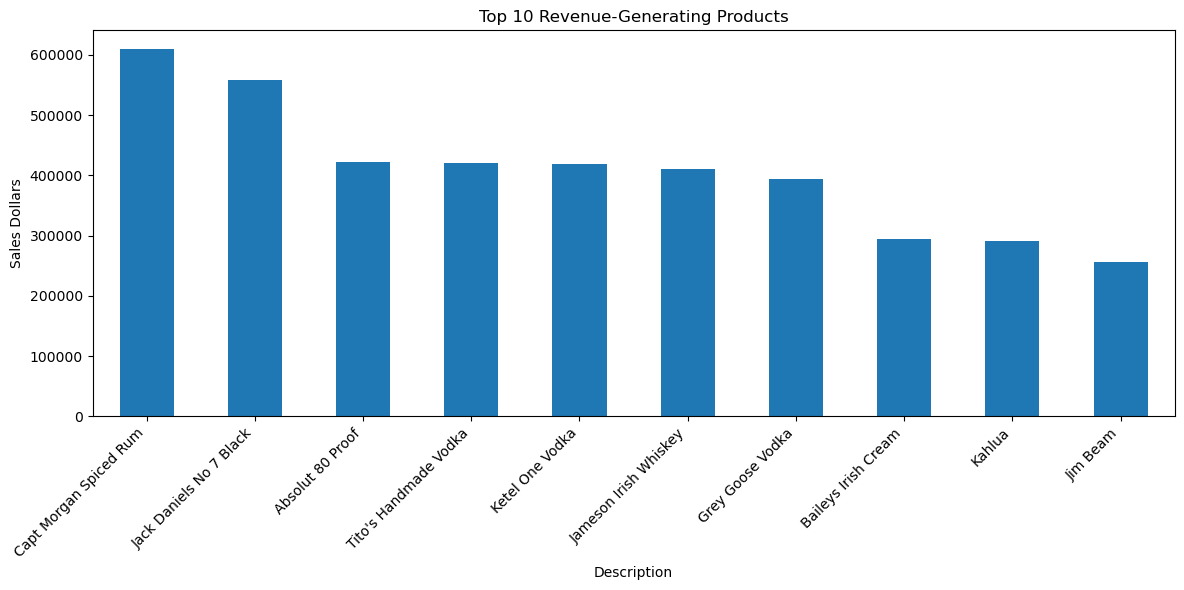

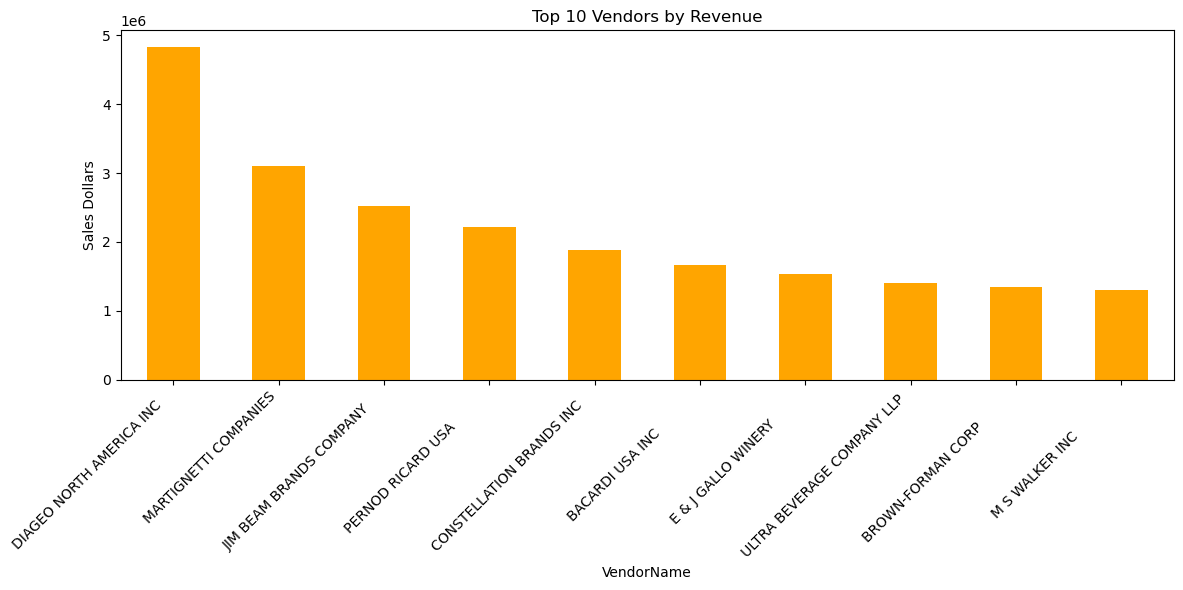

In [25]:
# Top Revenue Products Chart
top_revenue_products.plot(kind='bar', figsize=(12, 6), legend=False)
plt.title('Top 10 Revenue-Generating Products')
plt.ylabel('Sales Dollars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top Vendors Chart
top_vendors.plot(kind='bar', figsize=(12, 6), legend=False, color='orange')
plt.title('Top 10 Vendors by Revenue')
plt.ylabel('Sales Dollars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [27]:
vendor_perf = sales.groupby('VendorName').agg({
    'SalesDollars': 'sum',
    'SalesQuantity': 'sum',
    'InventoryId': 'nunique'  # Unique product count
}).rename(columns={
    'SalesDollars': 'TotalRevenue',
    'SalesQuantity': 'TotalUnitsSold',
    'InventoryId': 'UniqueProducts'
})

# Add Avg Price per Unit
vendor_perf['AvgPricePerUnit'] = vendor_perf['TotalRevenue'] / vendor_perf['TotalUnitsSold']

# Sort by revenue for visibility
vendor_perf = vendor_perf.sort_values(by='TotalRevenue', ascending=False)

print(vendor_perf.head(10))  # Top 10 vendors


                             TotalRevenue  TotalUnitsSold  UniqueProducts  \
VendorName                                                                  
DIAGEO NORTH AMERICA INC       4832706.85          423895           14334   
MARTIGNETTI COMPANIES          3107790.36          182044           15465   
JIM BEAM BRANDS COMPANY        2522931.01          207599           12408   
PERNOD RICARD USA              2216331.21          109318            7124   
CONSTELLATION BRANDS INC       1879079.02          168402           11320   
BACARDI USA INC                1663604.55          101595            6073   
E & J GALLO WINERY             1527351.89          143047           10348   
ULTRA BEVERAGE COMPANY LLP     1401105.12           85600            8978   
BROWN-FORMAN CORP              1349888.31           74819            3820   
M S WALKER INC                 1300864.08          110218            8659   

                             AvgPricePerUnit  
VendorName                  

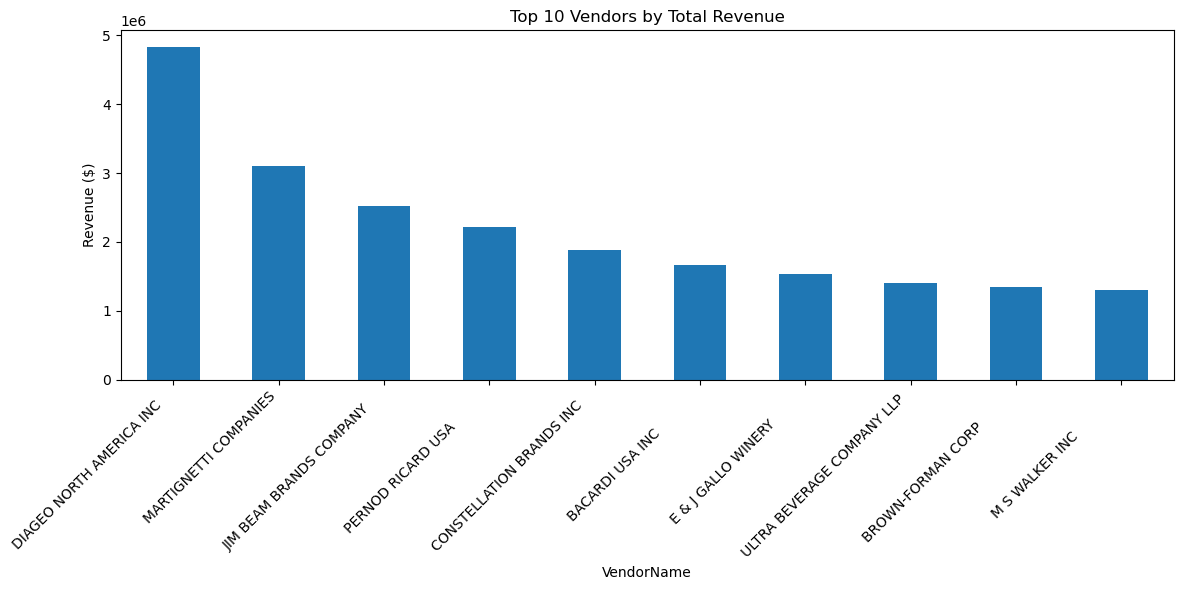

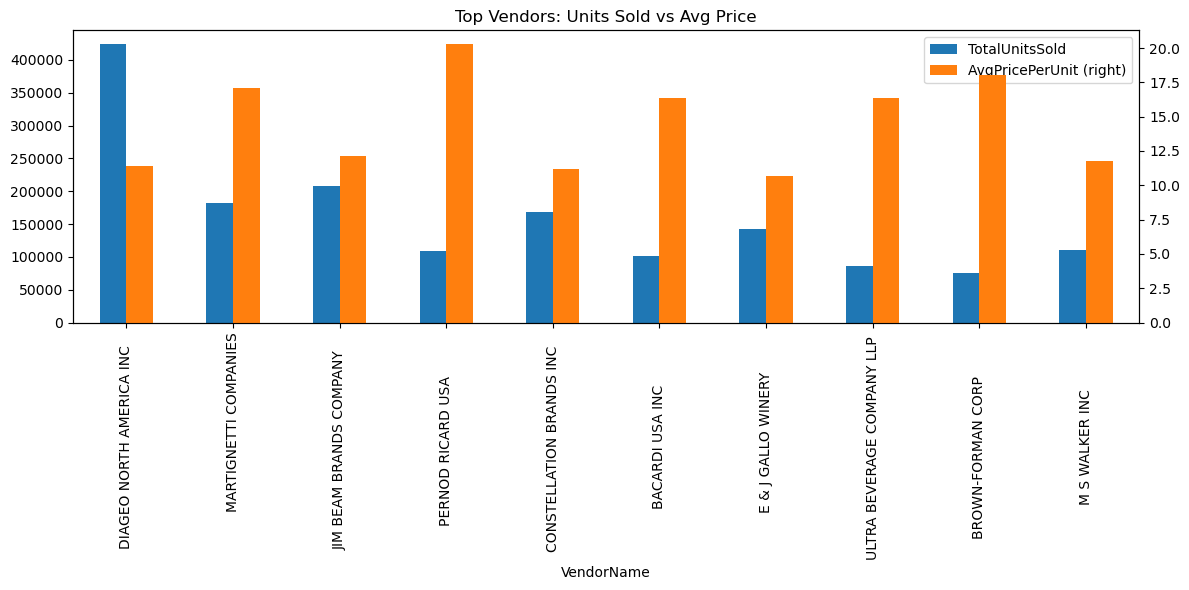

In [29]:
top_vendors = vendor_perf.head(10)

# Total Revenue Comparison
top_vendors[['TotalRevenue']].plot(kind='bar', figsize=(12, 6), legend=False)
plt.title('Top 10 Vendors by Total Revenue')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Units Sold vs Avg Price
top_vendors[['TotalUnitsSold', 'AvgPricePerUnit']].plot(kind='bar', secondary_y='AvgPricePerUnit', figsize=(12, 6))
plt.title('Top Vendors: Units Sold vs Avg Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


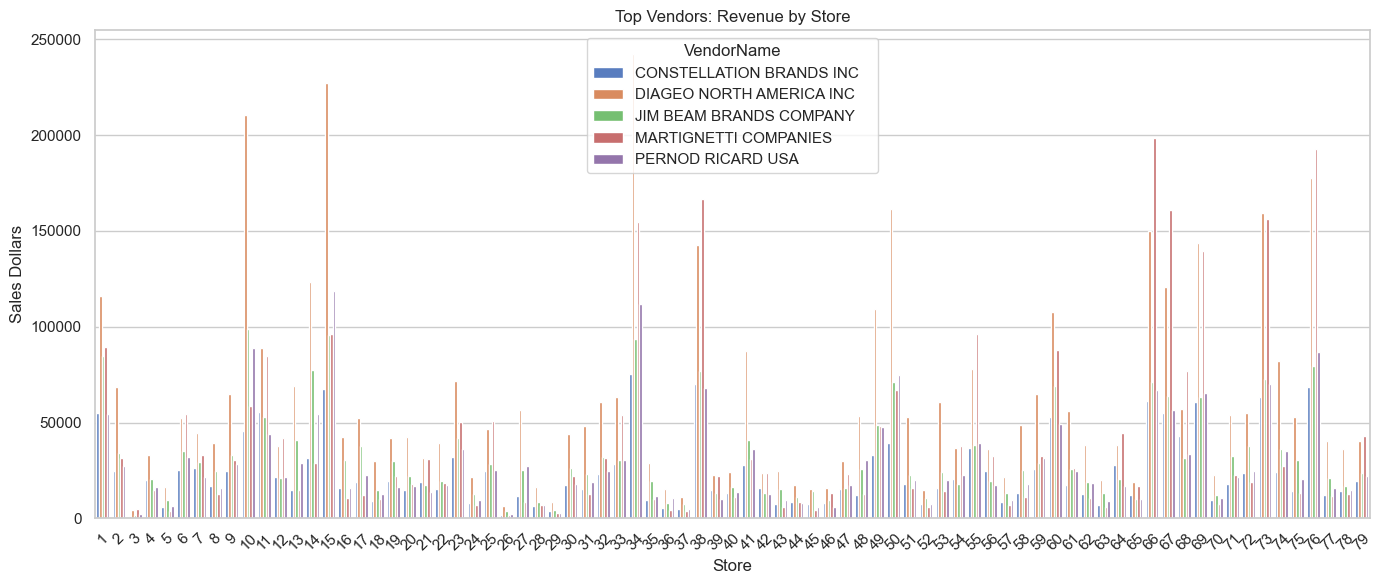

In [37]:
vendor_store_perf = sales.groupby(['VendorName', 'Store']).agg({
    'SalesDollars': 'sum'
}).reset_index()

# Top Vendors (optional filter)
top_vendor_names = vendor_perf.head(5).index.tolist()
vendor_store_top = vendor_store_perf[vendor_store_perf['VendorName'].isin(top_vendor_names)]

# Plot for each top vendor
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.barplot(data=vendor_store_top, x='Store', y='SalesDollars', hue='VendorName')
plt.title('Top Vendors: Revenue by Store')
plt.ylabel('Sales Dollars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


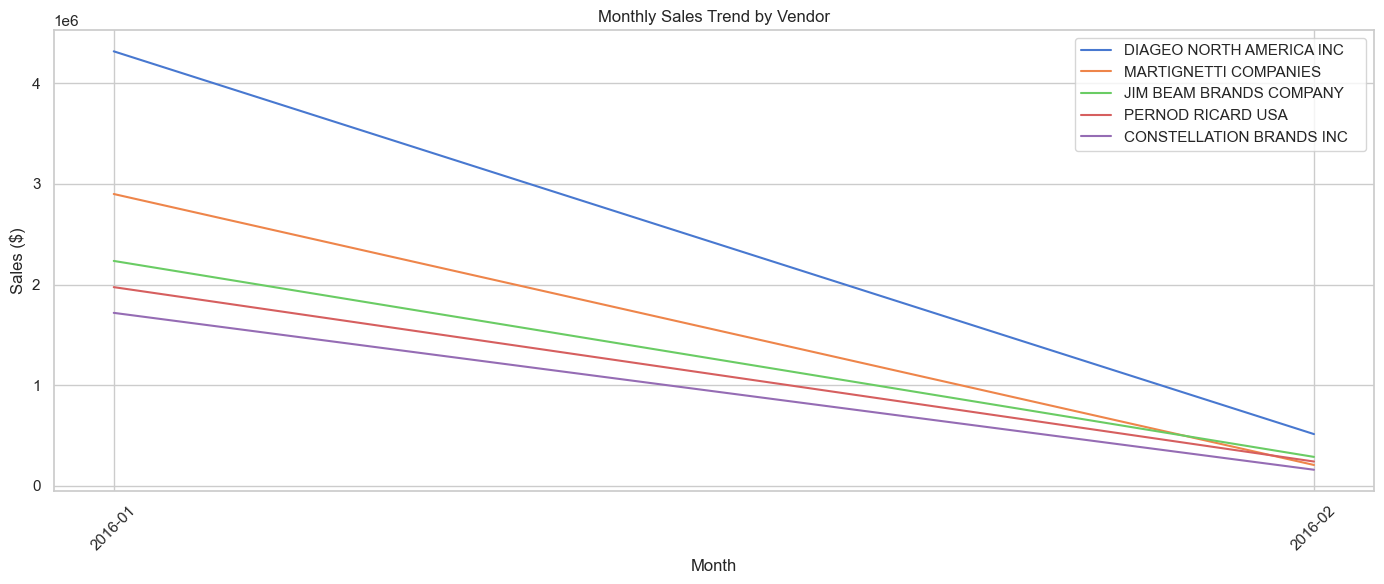

In [39]:
# Add YearMonth column if not already added
sales['YearMonth'] = sales['SalesDate'].dt.to_period('M')

monthly_vendor = sales.groupby(['VendorName', 'YearMonth']).agg({
    'SalesDollars': 'sum'
}).reset_index()

# Filter top vendors
monthly_vendor_top = monthly_vendor[monthly_vendor['VendorName'].isin(top_vendor_names)]

plt.figure(figsize=(14, 6))
for vendor in top_vendor_names:
    data = monthly_vendor_top[monthly_vendor_top['VendorName'] == vendor]
    plt.plot(data['YearMonth'].astype(str), data['SalesDollars'], label=vendor)

plt.title('Monthly Sales Trend by Vendor')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


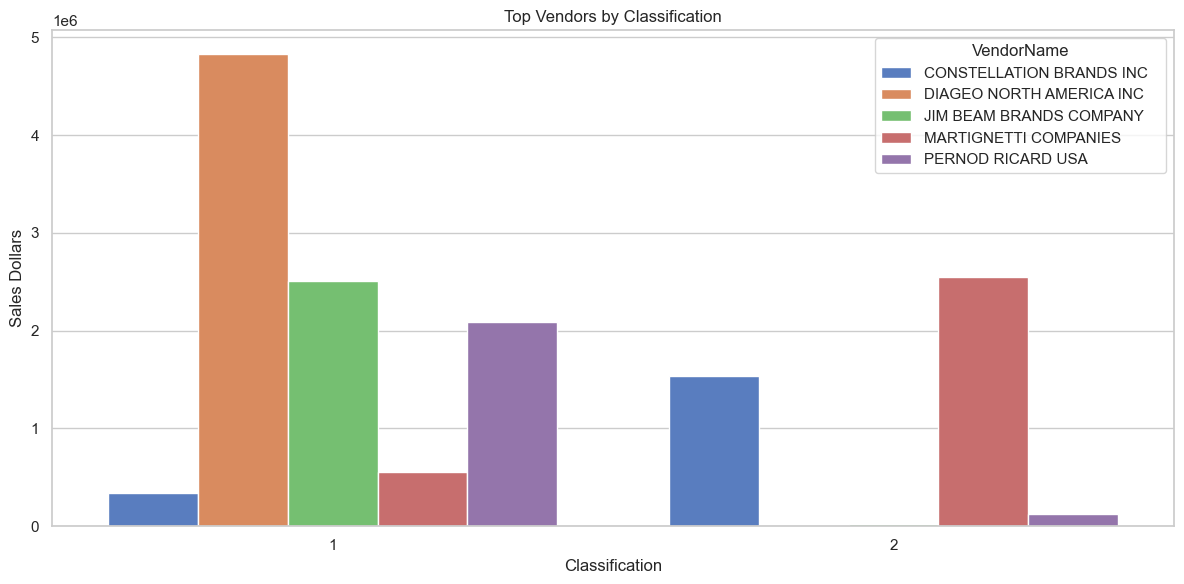

In [41]:
vendor_class_perf = sales.groupby(['VendorName', 'Classification']).agg({
    'SalesDollars': 'sum'
}).reset_index()

vendor_class_top = vendor_class_perf[vendor_class_perf['VendorName'].isin(top_vendor_names)]

plt.figure(figsize=(12, 6))
sns.barplot(data=vendor_class_top, x='Classification', y='SalesDollars', hue='VendorName')
plt.title('Top Vendors by Classification')
plt.ylabel('Sales Dollars')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [43]:
# Reuse earlier vendor_perf DataFrame
vendor_perf_sorted = vendor_perf.sort_values(by='TotalRevenue', ascending=False)

# Show top 15 for inspection
print(vendor_perf_sorted.head(15))


                             TotalRevenue  TotalUnitsSold  UniqueProducts  \
VendorName                                                                  
DIAGEO NORTH AMERICA INC       4832706.85          423895           14334   
MARTIGNETTI COMPANIES          3107790.36          182044           15465   
JIM BEAM BRANDS COMPANY        2522931.01          207599           12408   
PERNOD RICARD USA              2216331.21          109318            7124   
CONSTELLATION BRANDS INC       1879079.02          168402           11320   
BACARDI USA INC                1663604.55          101595            6073   
E & J GALLO WINERY             1527351.89          143047           10348   
ULTRA BEVERAGE COMPANY LLP     1401105.12           85600            8978   
BROWN-FORMAN CORP              1349888.31           74819            3820   
M S WALKER INC                 1300864.08          110218            8659   
SAZERAC CO INC                  949459.20           95420            4285   

C:\Users\user\AppData\Local\Temp\ipykernel_15816\4192475629.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='SalesDollars', y='Description', palette='Blues_d')
C:\Users\user\AppData\Local\Temp\ipykernel_15816\4192475629.py:11: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


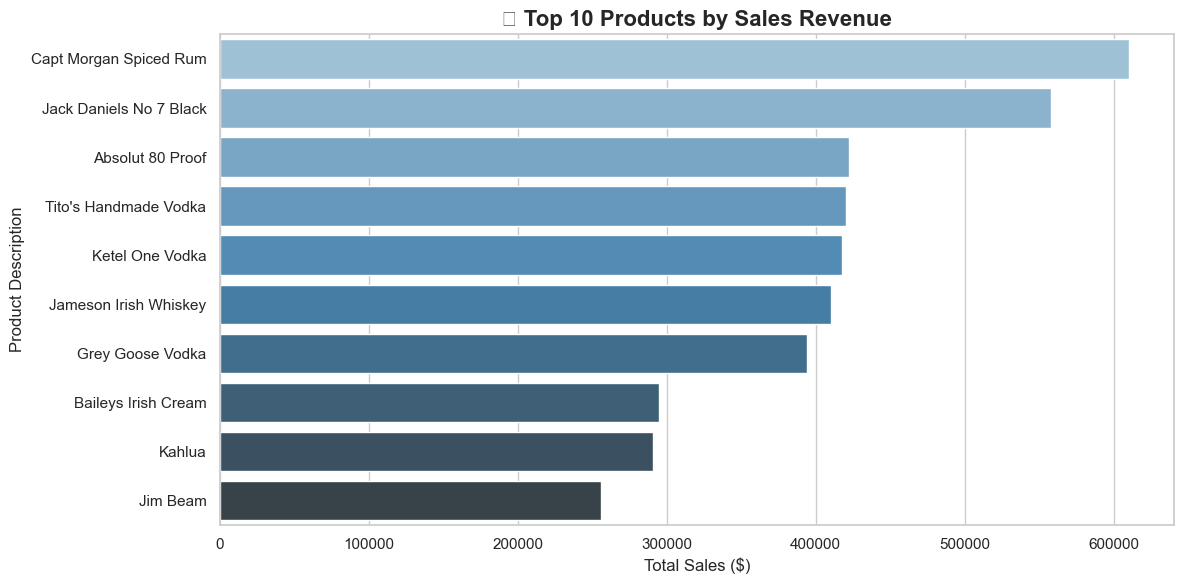

In [45]:
top_products = sales.groupby('Description').agg({
    'SalesDollars': 'sum',
    'SalesQuantity': 'sum'
}).sort_values(by='SalesDollars', ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='SalesDollars', y='Description', palette='Blues_d')
plt.title('💰 Top 10 Products by Sales Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_15816\185126778.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vendors, x='TotalRevenue', y='VendorName', palette='Set3')
C:\Users\user\AppData\Local\Temp\ipykernel_15816\185126778.py:13: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


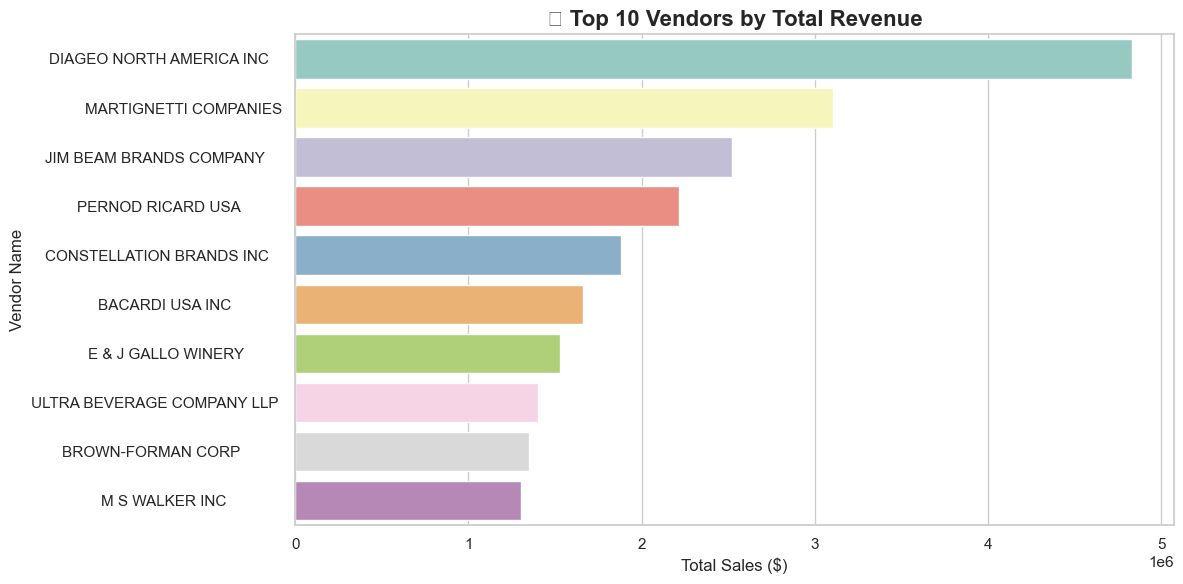

In [47]:
vendor_perf = sales.groupby('VendorName').agg({
    'SalesDollars': 'sum',
    'SalesQuantity': 'sum'
}).rename(columns={'SalesDollars': 'TotalRevenue', 'SalesQuantity': 'TotalUnits'}).sort_values(by='TotalRevenue', ascending=False)

top_vendors = vendor_perf.head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_vendors, x='TotalRevenue', y='VendorName', palette='Set3')
plt.title('🏢 Top 10 Vendors by Total Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales ($)')
plt.ylabel('Vendor Name')
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_15816\2112034345.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fast_selling, x='SalesQuantity', y='Description', palette='Greens_d')
C:\Users\user\AppData\Local\Temp\ipykernel_15816\2112034345.py:10: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


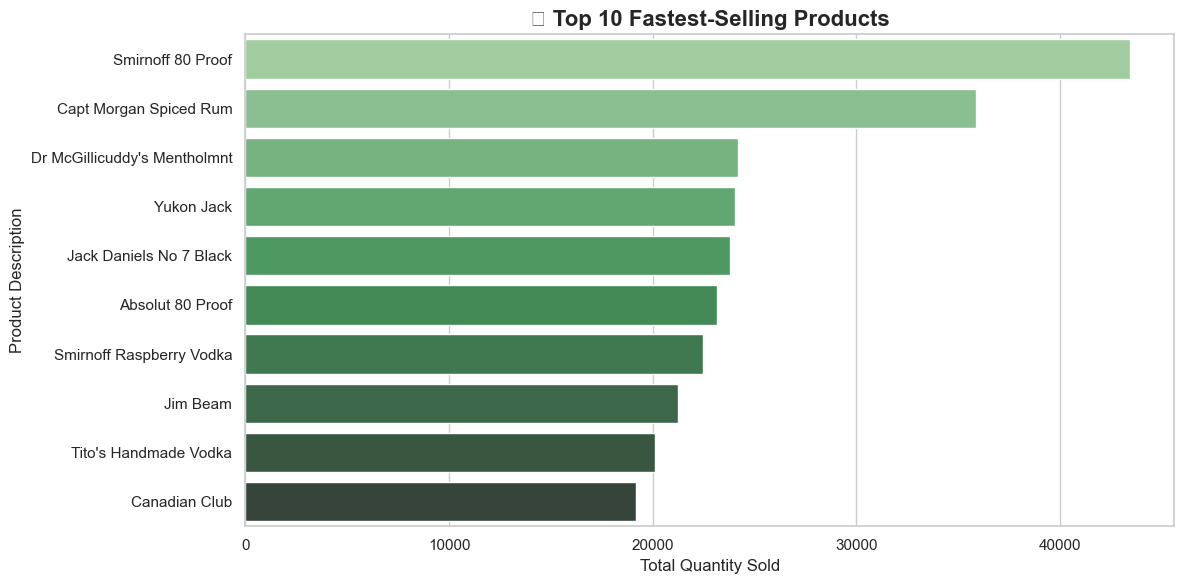

In [49]:
fast_selling = sales.groupby('Description').agg({
    'SalesQuantity': 'sum'
}).sort_values(by='SalesQuantity', ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=fast_selling, x='SalesQuantity', y='Description', palette='Greens_d')
plt.title('📦 Top 10 Fastest-Selling Products', fontsize=16, fontweight='bold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


In [51]:
product_sales = sales.groupby('Description').agg({
    'SalesDollars': 'sum'
}).sort_values(by='SalesDollars', ascending=False).reset_index()


In [53]:
product_sales['CumulativeSales'] = product_sales['SalesDollars'].cumsum()
product_sales['CumulativePerc'] = 100 * product_sales['CumulativeSales'] / product_sales['SalesDollars'].sum()


In [55]:
def classify(row):
    if row['CumulativePerc'] <= 80:
        return 'A'
    elif row['CumulativePerc'] <= 95:
        return 'B'
    else:
        return 'C'

product_sales['Category'] = product_sales.apply(classify, axis=1)


C:\Users\user\AppData\Local\Temp\ipykernel_15816\1688706365.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=abc_counts.index, y=abc_counts.values, palette=['#FF9999', '#FFD700', '#90EE90'])
C:\Users\user\AppData\Local\Temp\ipykernel_15816\1688706365.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


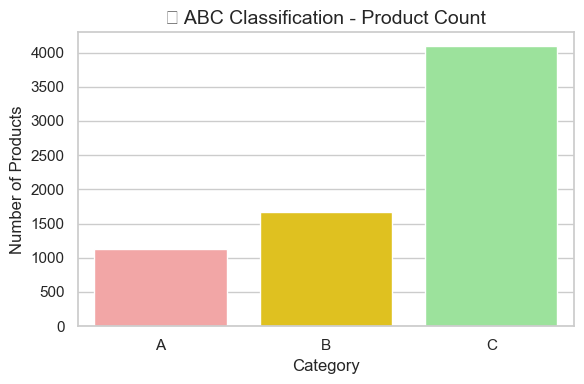

In [57]:
abc_counts = product_sales['Category'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=abc_counts.index, y=abc_counts.values, palette=['#FF9999', '#FFD700', '#90EE90'])
plt.title('📊 ABC Classification - Product Count', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()


In [59]:
abc_summary = product_sales.groupby('Category').agg({
    'Description': 'count',
    'SalesDollars': 'sum'
}).rename(columns={'Description': 'NumProducts'}).reset_index()

abc_summary['SalesPerc'] = 100 * abc_summary['SalesDollars'] / product_sales['SalesDollars'].sum()
print(abc_summary)


  Category  NumProducts  SalesDollars  SalesPerc
0        A         1126   26511358.16  79.999571
1        B         1673    4969805.27  14.996678
2        C         4091    1658211.86   5.003751


In [61]:
store_product_sales = sales.groupby(['Store', 'Description']).agg({
    'SalesDollars': 'sum'
}).sort_values(['Store', 'SalesDollars'], ascending=[True, False]).reset_index()


In [63]:
def classify_abc(group):
    group = group.sort_values(by='SalesDollars', ascending=False).copy()
    group['CumulativeSales'] = group['SalesDollars'].cumsum()
    group['CumulativePerc'] = 100 * group['CumulativeSales'] / group['SalesDollars'].sum()
    group['Category'] = group['CumulativePerc'].apply(
        lambda x: 'A' if x <= 80 else ('B' if x <= 95 else 'C')
    )
    return group

store_product_abc = store_product_sales.groupby('Store').apply(classify_abc).reset_index(drop=True)


C:\Users\user\AppData\Local\Temp\ipykernel_15816\1558126832.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  store_product_abc = store_product_sales.groupby('Store').apply(classify_abc).reset_index(drop=True)


In [65]:
store_product_abc.head(10)


,Store,Description,SalesDollars,CumulativeSales,CumulativePerc,Category
0,1,Jack Daniels No 7 Black,13204.51,13204.51,1.354148,A
1,1,Capt Morgan Spiced Rum,11897.59,25102.10,2.574268,A
2,1,Jameson Irish Whiskey,8998.76,34100.86,3.497109,A
3,1,Tito's Handmade Vodka,8913.46,43014.32,4.411201,A
4,1,Absolut 80 Proof,7829.30,50843.62,5.214111,A
5,1,Grey Goose Vodka,7651.86,58495.48,5.998824,A
6,1,Jim Beam,7158.47,65653.95,6.732938,A
7,1,Kahlua,7103.21,72757.16,7.461386,A
8,1,Jagermeister Liqueur,6688.46,79445.62,8.147301,A
9,1,Ketel One Vodka,6379.91,85825.53,8.801573,A


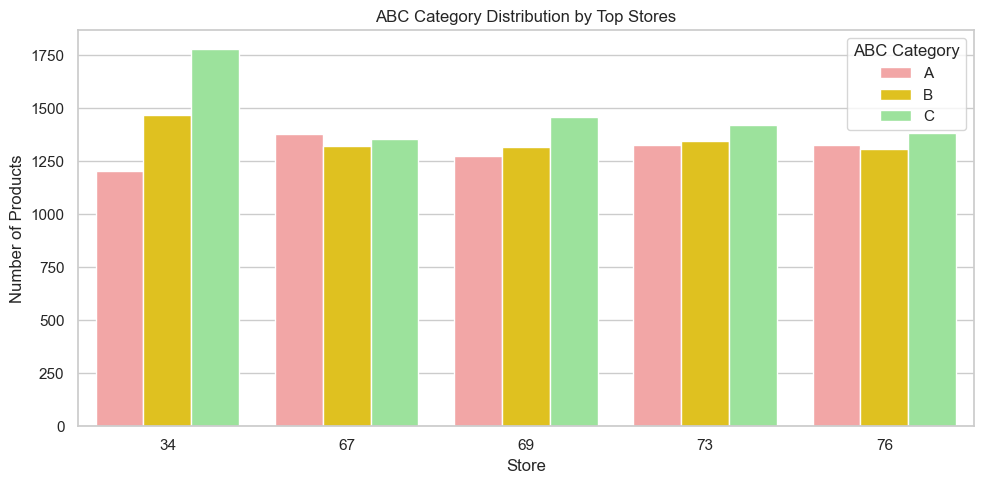

In [67]:
top_stores = store_product_abc['Store'].value_counts().head(5).index.tolist()
filtered = store_product_abc[store_product_abc['Store'].isin(top_stores)]

plt.figure(figsize=(10, 5))
sns.countplot(data=filtered, x='Store', hue='Category', palette=['#FF9999', '#FFD700', '#90EE90'])
plt.title('ABC Category Distribution by Top Stores')
plt.ylabel('Number of Products')
plt.xlabel('Store')
plt.legend(title='ABC Category')
plt.tight_layout()
plt.show()


In [69]:
# Export the ABC categorized data
store_product_abc.to_csv('StoreWise_ABC_Analysis.csv', index=False)

print("✅ File 'StoreWise_ABC_Analysis.csv' has been successfully saved.")


✅ File 'StoreWise_ABC_Analysis.csv' has been successfully saved.


In [71]:
import os
print(os.getcwd())


C:\Users\user\Desktop\wine_inventory


In [73]:
import os

# Define output folder
output_folder = 'C:/Users/user/Desktop/wine/output/store_abc_files'

# Create folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through each store and export a separate CSV
for store_id, store_df in store_product_abc.groupby('Store'):
    store_filename = f"Store_{store_id}_ABC_Analysis.csv"
    full_path = os.path.join(output_folder, store_filename)
    store_df.to_csv(full_path, index=False)

print(f"✅ Export complete. Files saved in: {output_folder}")


✅ Export complete. Files saved in: C:/Users/user/Desktop/wine/output/store_abc_files


In [75]:
import os
print(os.getcwd())


C:\Users\user\Desktop\wine_inventory


In [77]:
import os
import pandas as pd

# Define output folder
output_folder = 'C:/Users/user/Desktop/wine/output/store_abc_excel'
os.makedirs(output_folder, exist_ok=True)

# Export each store's data into a separate Excel file
for store_id, store_df in store_product_abc.groupby('Store'):
    filename = f"Store_{store_id}_ABC_Analysis.xlsx"
    filepath = os.path.join(output_folder, filename)
    store_df.to_excel(filepath, index=False)

print(f"✅ All Excel files saved in: {output_folder}")


✅ All Excel files saved in: C:/Users/user/Desktop/wine/output/store_abc_excel


In [79]:
import numpy as np

# 1. Top 20 selling products
top_products = sales.groupby('Description').agg({
    'SalesQuantity': 'sum',
    'SalesPrice': 'mean'
}).sort_values(by='SalesQuantity', ascending=False).head(20).reset_index()

# 2. EOQ assumptions
ordering_cost = 500  # Rs per order
top_products['AnnualDemand'] = top_products['SalesQuantity']  # Assuming 1 year data
top_products['HoldingCost'] = 0.10 * top_products['SalesPrice']  # 10% of price as annual holding cost

# 3. EOQ calculation
top_products['EOQ'] = np.sqrt((2 * top_products['AnnualDemand'] * ordering_cost) / top_products['HoldingCost'])

# 4. Display result
eoq_result = top_products[['Description', 'AnnualDemand', 'SalesPrice', 'HoldingCost', 'EOQ']]
print(eoq_result.round(2))


                     Description  AnnualDemand  SalesPrice  HoldingCost  \
0              Smirnoff 80 Proof         43423       10.05         1.01   
1         Capt Morgan Spiced Rum         35866       13.69         1.37   
2   Dr McGillicuddy's Mentholmnt         24188        8.30         0.83   
3                     Yukon Jack         24037        6.27         0.63   
4        Jack Daniels No 7 Black         23797       20.59         2.06   
5               Absolut 80 Proof         23171       16.97         1.70   
6       Smirnoff Raspberry Vodka         22459        8.48         0.85   
7                       Jim Beam         21239       13.11         1.31   
8          Tito's Handmade Vodka         20125       19.29         1.93   
9                  Canadian Club         19187        8.98         0.90   
10                    Skyy Vodka         18586       11.96         1.20   
11          Bacardi Superior Rum         17861       10.24         1.02   
12           Baileys Iris

C:\Users\user\AppData\Local\Temp\ipykernel_15816\361421531.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=eoq_result.sort_values('EOQ', ascending=False),


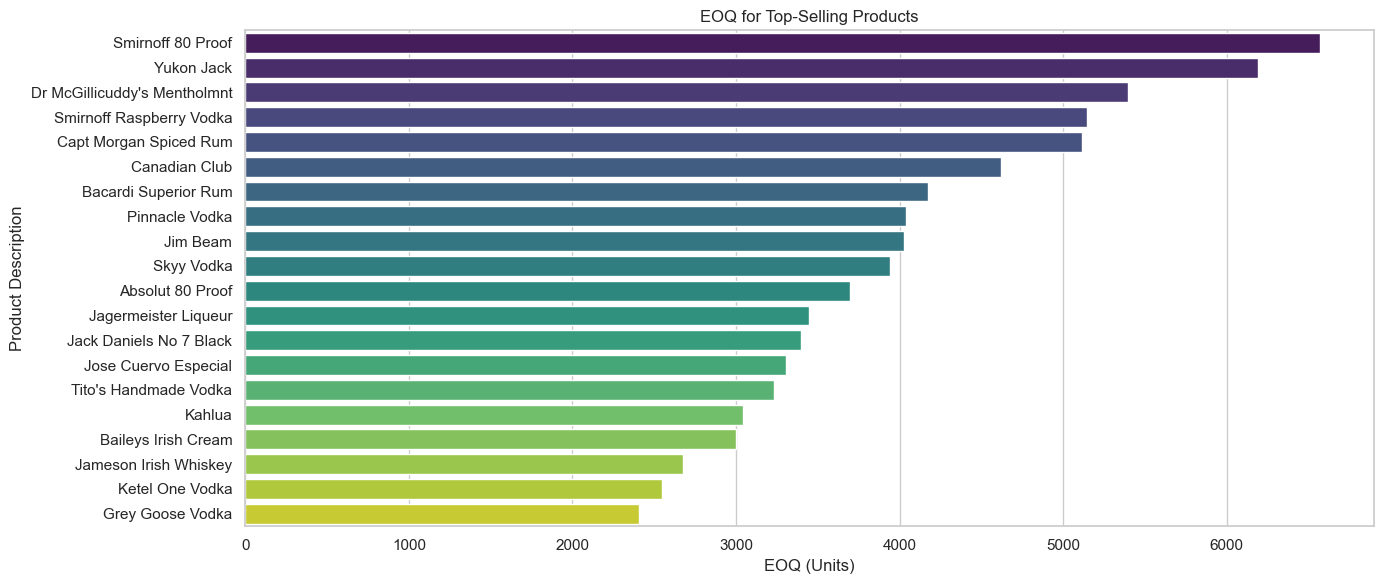

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.barplot(data=eoq_result.sort_values('EOQ', ascending=False),
            x='EOQ', y='Description', palette='viridis')

plt.title('EOQ for Top-Selling Products')
plt.xlabel('EOQ (Units)')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


In [83]:
# Define output path
eoq_output_path = 'C:/Users/user/Desktop/wine/output/top_product_eoq.xlsx'

# Save to Excel
eoq_result.to_excel(eoq_output_path, index=False)

print(f"✅ EOQ results saved to: {eoq_output_path}")


✅ EOQ results saved to: C:/Users/user/Desktop/wine/output/top_product_eoq.xlsx


In [103]:
model = ExponentialSmoothing(monthly_ts, trend='add').fit()


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Data covers 2 months
2   -1.078480e+06
3   -2.413256e+06
4   -3.748033e+06
5   -5.082809e+06
6   -6.417585e+06
7   -7.752362e+06
dtype: float64


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


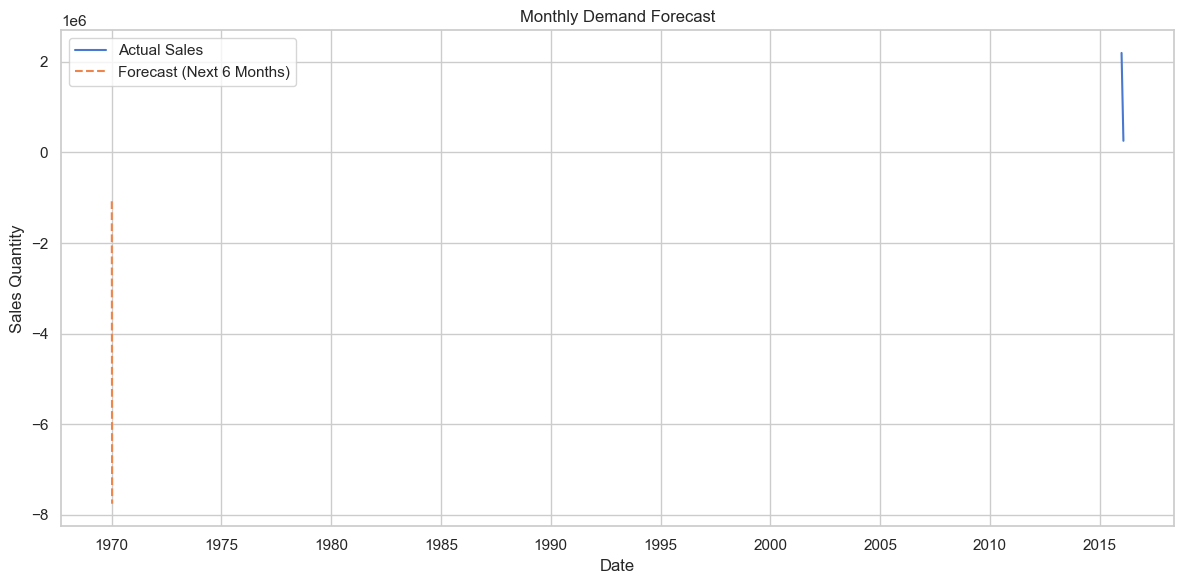

In [111]:
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt

# 1. Prepare monthly aggregated time series
monthly_demand = sales.copy()
monthly_demand['SalesDate'] = pd.to_datetime(monthly_demand['SalesDate'])
monthly_demand['YearMonth'] = monthly_demand['SalesDate'].dt.to_period('M')
monthly_ts = monthly_demand.groupby('YearMonth')['SalesQuantity'].sum()
monthly_ts.index = monthly_ts.index.to_timestamp()

# Check number of months
print(f"Data covers {len(monthly_ts)} months")

# 2. Fit Exponential Smoothing (trend only — no seasonality)
model = ExponentialSmoothing(monthly_ts, trend='add').fit()

# 3. Forecast next 6 months
forecast = model.forecast(6)

# 4. Print forecast
print(forecast)

# 5. Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_ts, label='Actual Sales')
plt.plot(forecast, label='Forecast (Next 6 Months)', linestyle='--')
plt.title('Monthly Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.tight_layout()
plt.show()



C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



Last 6 months of actuals + forecast:
2016-01-01 00:00:00    2.194959e+06
2016-02-01 00:00:00    2.562100e+05
2                     -1.078480e+06
3                     -2.413256e+06
4                     -3.748033e+06
5                     -5.082809e+06
6                     -6.417585e+06
7                     -7.752362e+06
dtype: float64


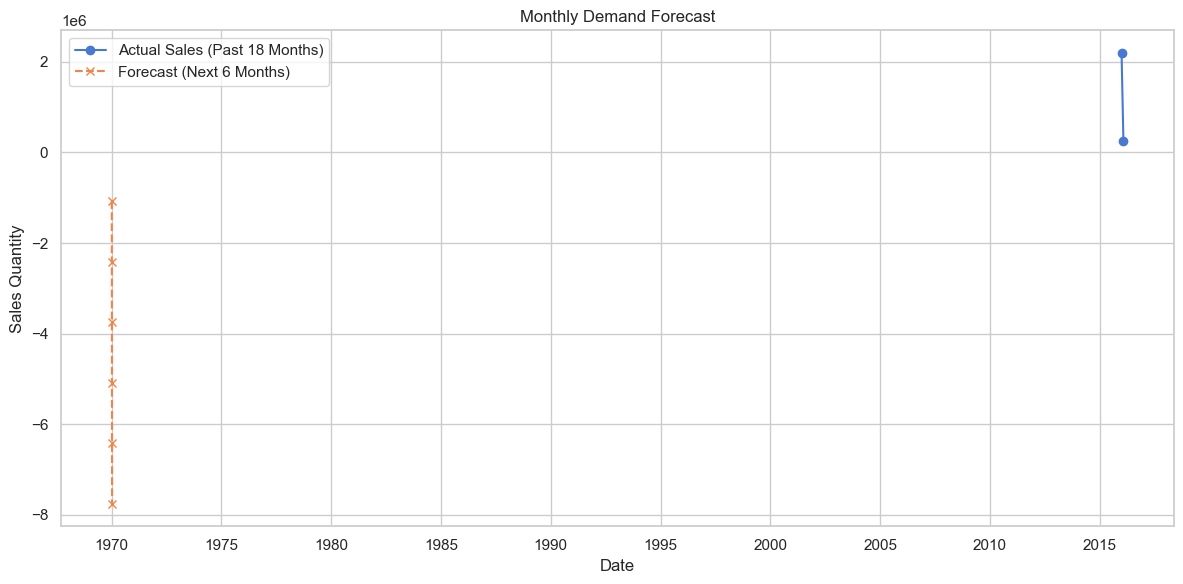

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing

# Prepare data again
monthly_demand = sales.copy()
monthly_demand['SalesDate'] = pd.to_datetime(monthly_demand['SalesDate'])
monthly_demand['YearMonth'] = monthly_demand['SalesDate'].dt.to_period('M')
monthly_ts = monthly_demand.groupby('YearMonth')['SalesQuantity'].sum()
monthly_ts.index = monthly_ts.index.to_timestamp()

# Fit model without seasonal term (to avoid earlier error)
model = ExponentialSmoothing(monthly_ts, trend='add').fit()

# Forecast
forecast_periods = 6
forecast = model.forecast(forecast_periods)

# Combine actual + forecast for display
combined = pd.concat([monthly_ts, forecast])
print("\nLast 6 months of actuals + forecast:")
print(combined.tail(forecast_periods + 6))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_ts[-18:], label='Actual Sales (Past 18 Months)', marker='o')
plt.plot(forecast, label='Forecast (Next 6 Months)', linestyle='--', marker='x')
plt.title('Monthly Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [115]:
# Clean monthly_ts
monthly_ts = monthly_ts.dropna()
monthly_ts = monthly_ts[monthly_ts > 0]  # Remove any negative/zero anomalies
monthly_ts.index = pd.to_datetime(monthly_ts.index)


In [117]:
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt

# Re-fit model
model = ExponentialSmoothing(monthly_ts, trend='add').fit()

# Forecast next 6 months
forecast_periods = 6
forecast_values = model.forecast(forecast_periods)

# Assign future datetime index
last_date = monthly_ts.index[-1]
forecast_index = pd.date_range(start=last_date + pd.offsets.MonthBegin(), periods=forecast_periods, freq='MS')
forecast = pd.Series(forecast_values, index=forecast_index)


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


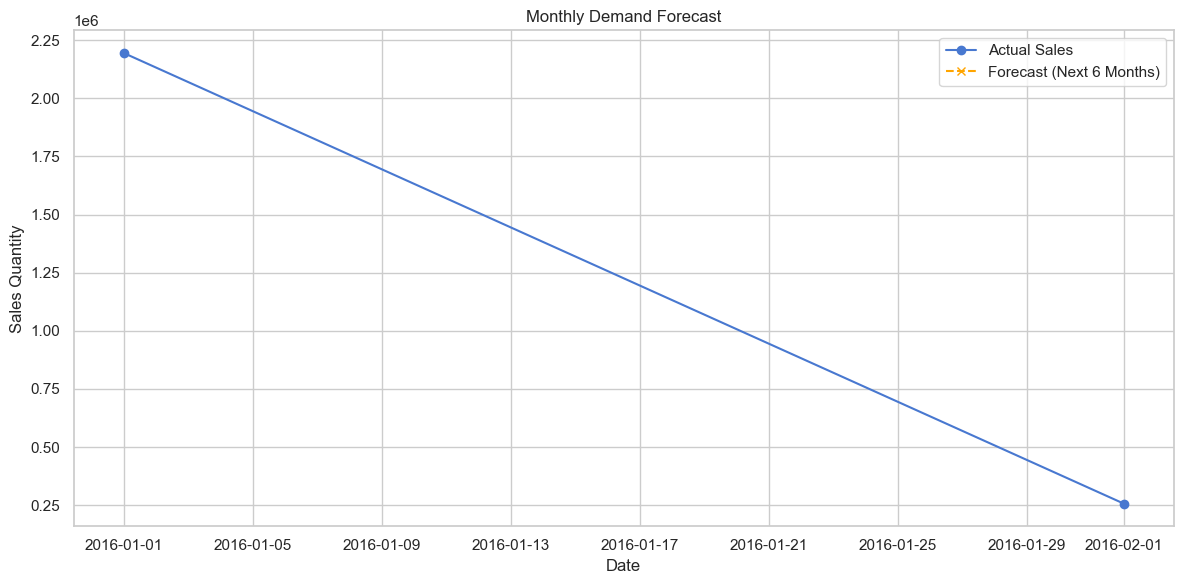

In [119]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_ts, label='Actual Sales', marker='o')
plt.plot(forecast, label='Forecast (Next 6 Months)', linestyle='--', marker='x', color='orange')
plt.title('Monthly Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [121]:
print(monthly_ts.tail())

YearMonth
2016-01-01    2194959
2016-02-01     256210
Name: SalesQuantity, dtype: int64


In [123]:
print(forecast)

2016-03-01   NaN
2016-04-01   NaN
2016-05-01   NaN
2016-06-01   NaN
2016-07-01   NaN
2016-08-01   NaN
Freq: MS, dtype: float64


In [125]:
# Remove NaNs and non-positive values (they can corrupt the model)
monthly_ts = monthly_ts.dropna()
monthly_ts = monthly_ts[monthly_ts > 0]


In [127]:
print(monthly_ts.tail(12))  # Check the last year of valid data


YearMonth
2016-01-01    2194959
2016-02-01     256210
Name: SalesQuantity, dtype: int64


In [129]:
print(f"Number of periods in data: {len(monthly_ts)}")


Number of periods in data: 2


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


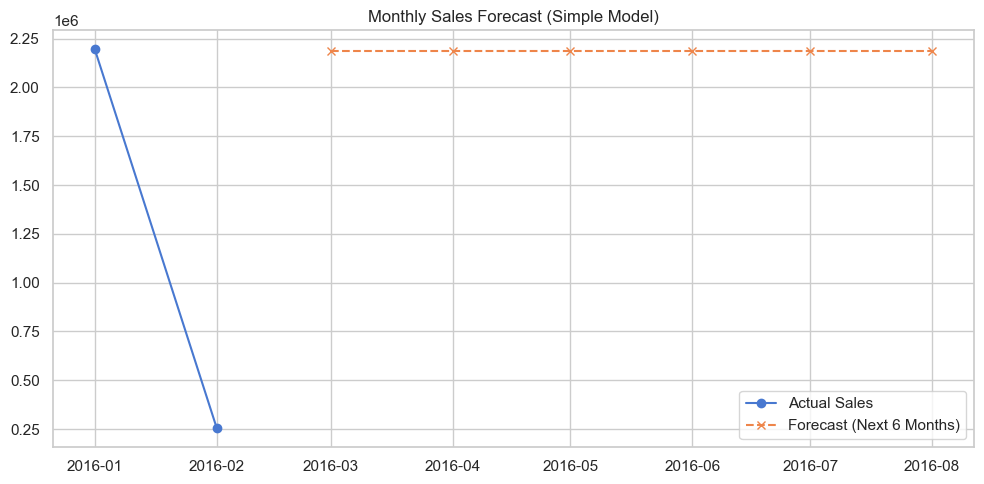

In [131]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt

# Fit simple exponential smoothing (no trend/seasonality)
model = SimpleExpSmoothing(monthly_ts).fit()

# Forecast 6 months
forecast = model.forecast(6)
forecast.index = pd.date_range(start=monthly_ts.index[-1] + pd.offsets.MonthBegin(), periods=6, freq='MS')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_ts, label='Actual Sales', marker='o')
plt.plot(forecast, label='Forecast (Next 6 Months)', linestyle='--', marker='x')
plt.title('Monthly Sales Forecast (Simple Model)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [137]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
monthly_ts = sales.resample('MS', on='SalesDate')['SalesQuantity'].sum()


In [139]:
print(f"Number of months: {len(monthly_ts)}")
print(monthly_ts.head())  # Peek at early data


Number of months: 2
SalesDate
2016-01-01    2194959
2016-02-01     256210
Freq: MS, Name: SalesQuantity, dtype: int64


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


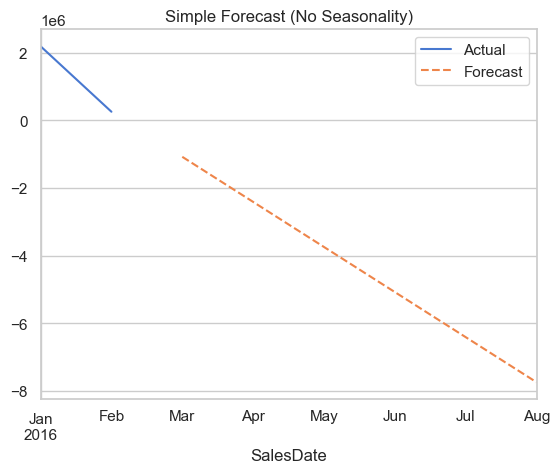

2016-03-01   -1.078480e+06
2016-04-01   -2.413256e+06
2016-05-01   -3.748033e+06
2016-06-01   -5.082809e+06
2016-07-01   -6.417585e+06
2016-08-01   -7.752362e+06
Freq: MS, dtype: float64


In [141]:
from statsmodels.tsa.api import ExponentialSmoothing

model = ExponentialSmoothing(monthly_ts, trend='add', seasonal=None).fit()
forecast = model.forecast(6)

# Plot
import matplotlib.pyplot as plt
monthly_ts.plot(label='Actual')
forecast.plot(label='Forecast', style='--')
plt.title('Simple Forecast (No Seasonality)')
plt.legend()
plt.show()

print(forecast)


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


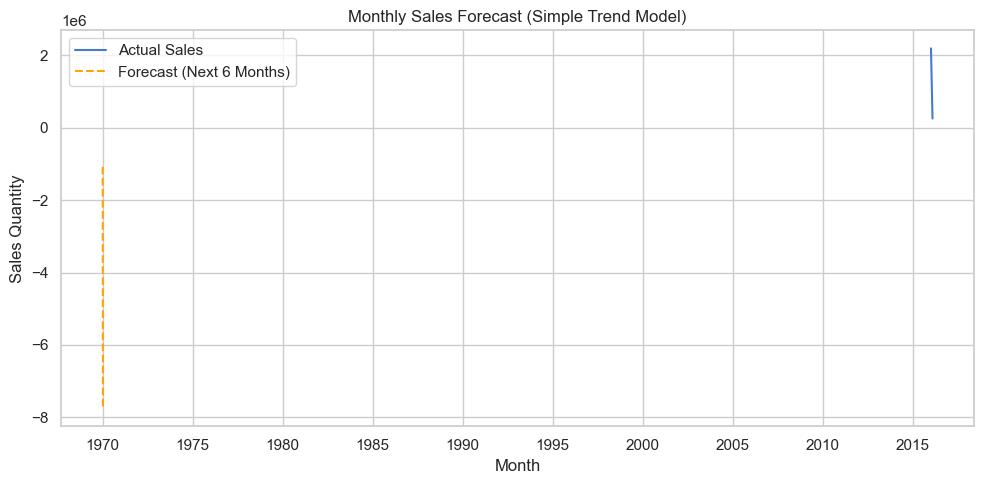

Forecasted Sales:
2   -1.078480e+06
3   -2.413256e+06
4   -3.748033e+06
5   -5.082809e+06
6   -6.417585e+06
7   -7.752362e+06
dtype: float64


In [145]:
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt

# Convert SalesDate to datetime and aggregate monthly
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
sales['YearMonth'] = sales['SalesDate'].dt.to_period('M')
monthly_ts = sales.groupby('YearMonth')['SalesQuantity'].sum()
monthly_ts.index = monthly_ts.index.to_timestamp()

# Fit model WITHOUT seasonality
model = ExponentialSmoothing(monthly_ts, trend='add', seasonal=None).fit()

# Forecast next 6 months
forecast = model.forecast(6)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_ts, label='Actual Sales')
plt.plot(forecast, label='Forecast (Next 6 Months)', linestyle='--', color='orange')
plt.title('Monthly Sales Forecast (Simple Trend Model)')
plt.xlabel('Month')
plt.ylabel('Sales Quantity')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Print forecasted values
print("Forecasted Sales:")
print(forecast)



📅 Number of months: 2
⚠️ Not enough data for seasonality. Using simple trend forecast.


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


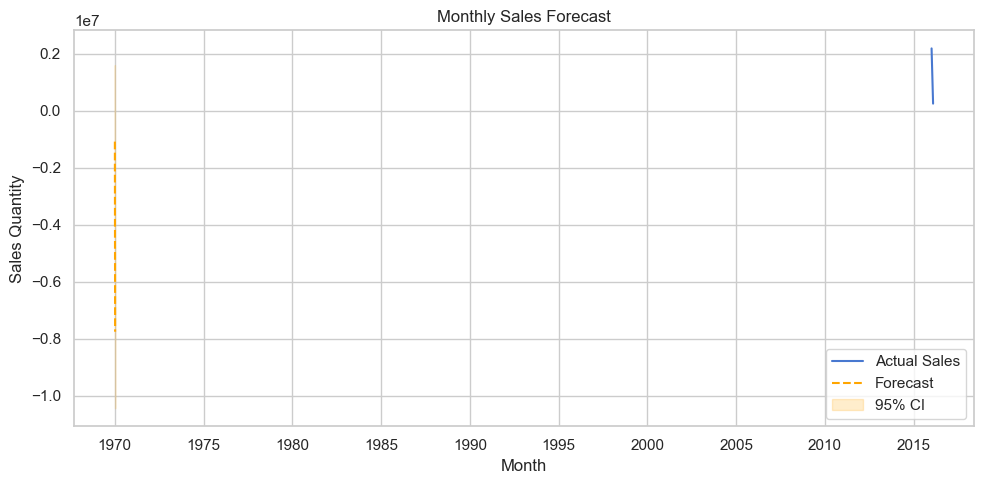

       Forecast     Lower_95%     Upper_95%
2 -1.078480e+06 -3.765833e+06  1.608873e+06
3 -2.413256e+06 -5.100610e+06  2.740968e+05
4 -3.748033e+06 -6.435386e+06 -1.060680e+06
5 -5.082809e+06 -7.770162e+06 -2.395456e+06
6 -6.417585e+06 -9.104939e+06 -3.730232e+06
7 -7.752362e+06 -1.043971e+07 -5.065009e+06


In [147]:
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt
import numpy as np

def forecast_sales(data, date_col='SalesDate', qty_col='SalesQuantity', forecast_periods=6):
    # 1. Prepare data
    data[date_col] = pd.to_datetime(data[date_col])
    data['YearMonth'] = data[date_col].dt.to_period('M')
    monthly_ts = data.groupby('YearMonth')[qty_col].sum()
    monthly_ts.index = monthly_ts.index.to_timestamp()

    print(f"📅 Number of months: {len(monthly_ts)}")

    # 2. Fallback if not enough data
    if len(monthly_ts) < 3:
        print("⚠️ Not enough data for seasonality. Using simple trend forecast.")
        model = ExponentialSmoothing(monthly_ts, trend='add', seasonal=None).fit()
    else:
        model = ExponentialSmoothing(monthly_ts, trend='add', seasonal='add', seasonal_periods=12).fit()

    # 3. Forecast
    forecast = model.forecast(forecast_periods)
    stderr = model.resid.std()
    lower = forecast - 1.96 * stderr
    upper = forecast + 1.96 * stderr

    # 4. Plot
    plt.figure(figsize=(10, 5))
    plt.plot(monthly_ts, label='Actual Sales')
    plt.plot(forecast, label='Forecast', linestyle='--', color='orange')
    plt.fill_between(forecast.index, lower, upper, color='orange', alpha=0.2, label='95% CI')
    plt.title('Monthly Sales Forecast')
    plt.xlabel('Month')
    plt.ylabel('Sales Quantity')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 5. Output
    forecast_df = pd.DataFrame({
        'Forecast': forecast,
        'Lower_95%': lower,
        'Upper_95%': upper
    })
    return forecast_df

# 🧪 Usage
forecast_df = forecast_sales(sales)
print(forecast_df)


In [149]:
import pandas as pd

# Define file paths
paths = {
    "2017PurchasePricesDec": r'C:\Users\user\Desktop\wine\datasets\2017PurchasePricesDec.csv',
    "BegInvFINAL12312016": r'C:\Users\user\Desktop\wine\datasets\BegInvFINAL12312016.csv',
    "EndInvFINAL12312016": r'C:\Users\user\Desktop\wine\datasets\EndInvFINAL12312016.csv',
    "InvoicePurchases12312016": r'C:\Users\user\Desktop\wine\datasets\InvoicePurchases12312016.csv',
    "PurchasesFINAL12312016": r'C:\Users\user\Desktop\wine\datasets\PurchasesFINAL12312016.csv',
    "SalesFINAL12312016": r'C:\Users\user\Desktop\wine\datasets\SalesFINAL12312016.csv'
}

# Load datasets
datasets = {name: pd.read_csv(path) for name, path in paths.items()}

# Quick overview of each dataset
for name, df in datasets.items():
    print(f"\n--- {name} ---")
    print(df.info())
    print(df.head())
    print("Missing Values:\n", df.isnull().sum())
    print("Summary Stats:\n", df.describe())



--- 2017PurchasePricesDec ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB
None
   Brand                  Description  Price   Size Volume  Classification  \
0     58  Gekkeikan Black & Gold Sake  12.99  750mL    750               1   
1     62     Herradura Silver Tequila  36.99  750mL    750               1   
2     63   Herradura Reposado Tequila  38.99  750mL    750     

In [159]:
import pandas as pd

# Load sales dataset
sales = pd.read_csv(r'C:\Users\user\Desktop\wine\datasets\SalesFINAL12312016.csv')

# Show actual column names
print(sales.columns)



Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')


In [161]:
top_sellers = sales.groupby('Description')['SalesQuantity'].sum().nlargest(top_n).index.tolist()



Top 5 Selling Products:
 ['Smirnoff 80 Proof', 'Capt Morgan Spiced Rum', "Dr McGillicuddy's Mentholmnt", 'Yukon Jack', 'Jack Daniels No 7 Black']


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


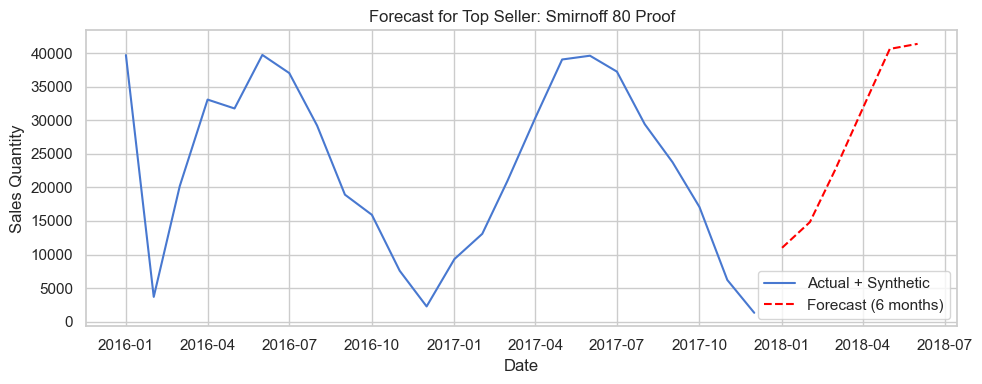


Forecast for 'Smirnoff 80 Proof':
 2018-01-01    11002.0
2018-02-01    14835.0
2018-03-01    22596.0
2018-04-01    31829.0
2018-05-01    40663.0
2018-06-01    41416.0
Freq: MS, dtype: float64


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


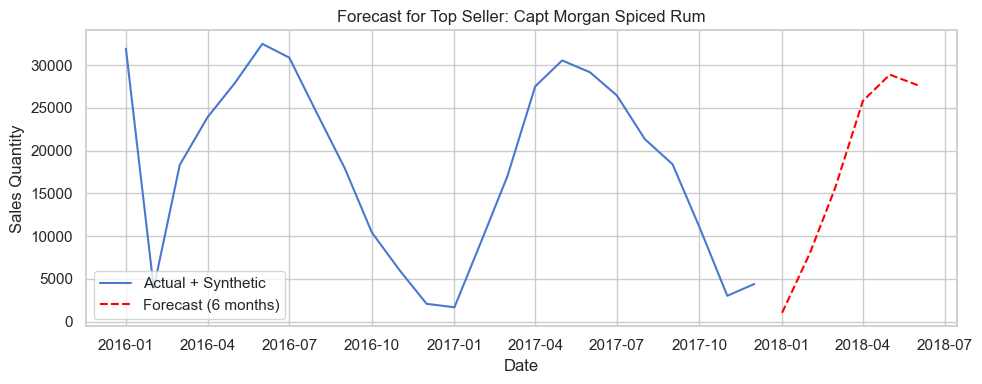


Forecast for 'Capt Morgan Spiced Rum':
 2018-01-01     1039.0
2018-02-01     8017.0
2018-03-01    15600.0
2018-04-01    25824.0
2018-05-01    28899.0
2018-06-01    27671.0
Freq: MS, dtype: float64


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


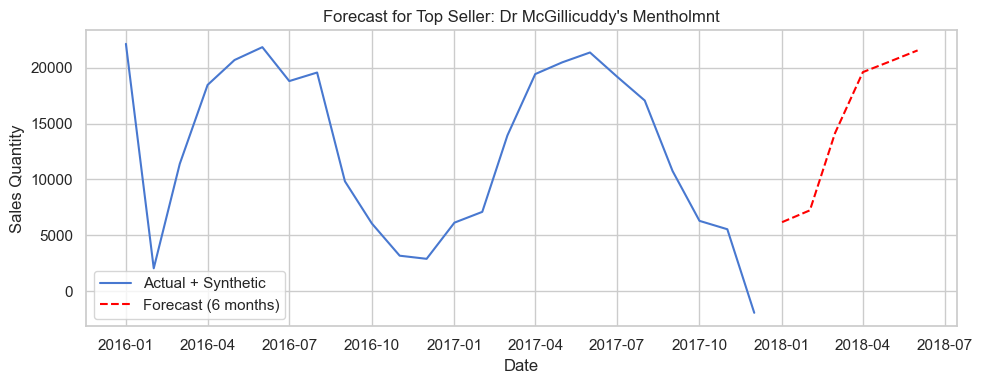


Forecast for 'Dr McGillicuddy's Mentholmnt':
 2018-01-01     6181.0
2018-02-01     7240.0
2018-03-01    14152.0
2018-04-01    19608.0
2018-05-01    20556.0
2018-06-01    21554.0
Freq: MS, dtype: float64


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


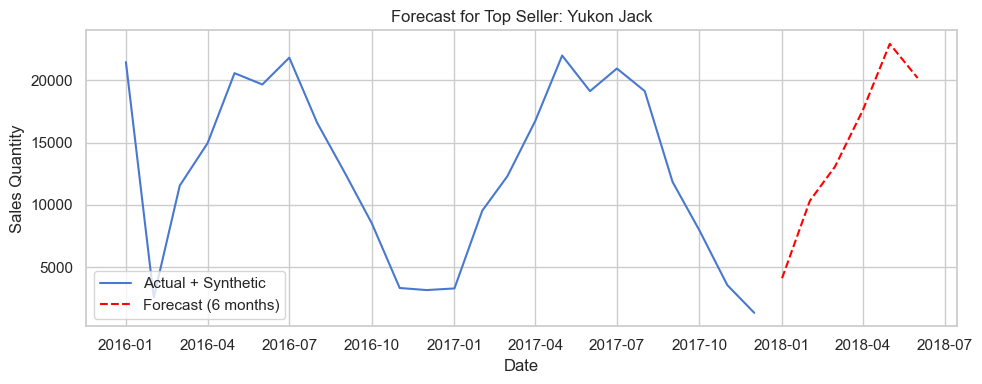


Forecast for 'Yukon Jack':
 2018-01-01     4114.0
2018-02-01    10334.0
2018-03-01    13077.0
2018-04-01    17606.0
2018-05-01    22928.0
2018-06-01    20186.0
Freq: MS, dtype: float64


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


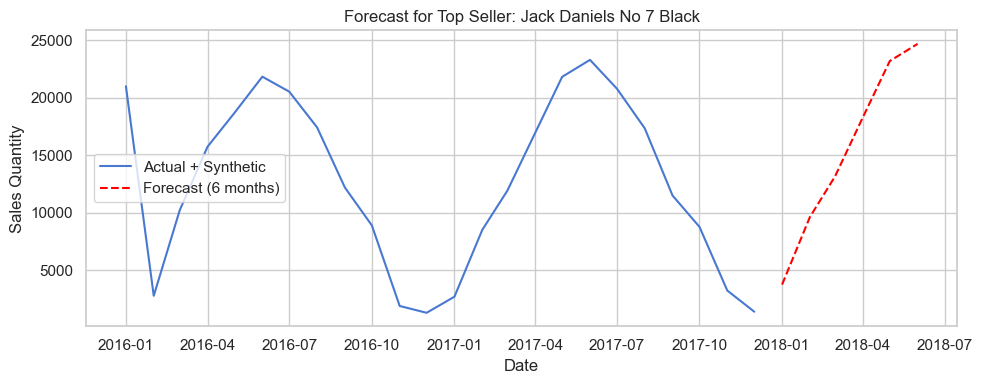


Forecast for 'Jack Daniels No 7 Black':
 2018-01-01     3766.0
2018-02-01     9640.0
2018-03-01    13166.0
2018-04-01    18302.0
2018-05-01    23192.0
2018-06-01    24685.0
Freq: MS, dtype: float64


In [163]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt

# Load your sales dataset
sales = pd.read_csv(r'C:\Users\user\Desktop\wine\datasets\SalesFINAL12312016.csv')

# Convert date
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])

# Step 1: Identify top-selling products
top_n = 5
top_sellers = sales.groupby('Description')['SalesQuantity'].sum().nlargest(top_n).index.tolist()
print(f"\nTop {top_n} Selling Products:\n", top_sellers)

# Step 2: Forecast for each top-selling product
for product in top_sellers:
    prod_data = sales[sales['Description'] == product].copy()
    prod_data['YearMonth'] = prod_data['SalesDate'].dt.to_period('M')
    monthly_ts = prod_data.groupby('YearMonth')['SalesQuantity'].sum()
    monthly_ts.index = monthly_ts.index.to_timestamp()

    # If data is too short, generate synthetic months
    if len(monthly_ts) < 12:
        original = monthly_ts.copy()
        avg = original.mean()
        amplitude = (original.max() - original.min()) / 2
        needed = 24 - len(original)
        last_date = original.index[-1]
        future_months = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=needed, freq='MS')
        seasonal_pattern = amplitude * np.sin(2 * np.pi * np.arange(len(future_months)) / 12) + avg
        noise = np.random.normal(scale=original.std() * 0.1, size=len(future_months))
        synthetic_values = seasonal_pattern + noise
        synthetic_ts = pd.Series(data=synthetic_values, index=future_months)
        monthly_ts = pd.concat([original, synthetic_ts])

    # Fit model
    model = ExponentialSmoothing(monthly_ts, trend='add', seasonal='add', seasonal_periods=12).fit()

    # Forecast next 6 months
    forecast = model.forecast(6)

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(monthly_ts, label='Actual + Synthetic')
    plt.plot(forecast, label='Forecast (6 months)', linestyle='--', color='red')
    plt.title(f"Forecast for Top Seller: {product}")
    plt.xlabel('Date')
    plt.ylabel('Sales Quantity')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Optional: print forecast values
    print(f"\nForecast for '{product}':\n", forecast.round(0))


In [167]:
import pandas as pd

paths = {
    "Sales": r'C:\Users\user\Desktop\wine\datasets\SalesFINAL12312016.csv',
    "Purchases": r'C:\Users\user\Desktop\wine\datasets\PurchasesFINAL12312016.csv',
    "Beginning Inventory": r'C:\Users\user\Desktop\wine\datasets\BegInvFINAL12312016.csv',
    "Ending Inventory": r'C:\Users\user\Desktop\wine\datasets\EndInvFINAL12312016.csv',
}

for name, path in paths.items():
    df = pd.read_csv(path, nrows=2)  # just sample top rows
    print(f"\n{name} Columns:\n", df.columns.tolist())



Sales Columns:
 ['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']

Purchases Columns:
 ['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']

Beginning Inventory Columns:
 ['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']

Ending Inventory Columns:
 ['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']


In [169]:
import pandas as pd

# Load datasets
sales = pd.read_csv(r'C:\Users\user\Desktop\wine\datasets\SalesFINAL12312016.csv')
purchases = pd.read_csv(r'C:\Users\user\Desktop\wine\datasets\PurchasesFINAL12312016.csv')
beg_inv = pd.read_csv(r'C:\Users\user\Desktop\wine\datasets\BegInvFINAL12312016.csv')
end_inv = pd.read_csv(r'C:\Users\user\Desktop\wine\datasets\EndInvFINAL12312016.csv')

# Use 'InventoryId' as product identifier for all
product_key = 'InventoryId'

# Aggregate sales quantity
sales_agg = sales.groupby(product_key)['SalesQuantity'].sum().reset_index().rename(columns={'SalesQuantity': 'TotalSales'})

# Aggregate purchase quantity
purch_agg = purchases.groupby(product_key)['Quantity'].sum().reset_index().rename(columns={'Quantity': 'TotalPurchases'})

# Aggregate beginning and ending inventory
beg_inv_agg = beg_inv.groupby(product_key)['onHand'].sum().reset_index().rename(columns={'onHand': 'BeginInventory'})
end_inv_agg = end_inv.groupby(product_key)['onHand'].sum().reset_index().rename(columns={'onHand': 'EndInventory'})

# Merge all into one DataFrame
df = sales_agg.merge(purch_agg, on=product_key, how='outer')
df = df.merge(beg_inv_agg, on=product_key, how='outer')
df = df.merge(end_inv_agg, on=product_key, how='outer')
df.fillna(0, inplace=True)

# Estimate net demand and reorder quantity
df['NetDemand'] = df['TotalSales'] - df['BeginInventory'] + df['EndInventory']
df['RecommendedReorder'] = df['NetDemand'] - df['TotalPurchases']
df['RecommendedReorder'] = df['RecommendedReorder'].apply(lambda x: max(0, round(x)))

# Show top products needing reorder
reorder_needed = df[df['RecommendedReorder'] > 0].sort_values(by='RecommendedReorder', ascending=False)
print(reorder_needed.head(10))


Empty DataFrame
Columns: [InventoryId, TotalSales, TotalPurchases, BeginInventory, EndInventory, NetDemand, RecommendedReorder]
Index: []


In [171]:
print("Sales InventoryId sample:\n", sales['InventoryId'].dropna().astype(str).unique()[:5])
print("Purchases InventoryId sample:\n", purchases['InventoryId'].dropna().astype(str).unique()[:5])
print("BegInv InventoryId sample:\n", beg_inv['InventoryId'].dropna().astype(str).unique()[:5])
print("EndInv InventoryId sample:\n", end_inv['InventoryId'].dropna().astype(str).unique()[:5])


Sales InventoryId sample:
 ['1_HARDERSFIELD_1004' '1_HARDERSFIELD_1005' '1_HARDERSFIELD_10058'
 '1_HARDERSFIELD_1006' '1_HARDERSFIELD_10062']
Purchases InventoryId sample:
 ['69_MOUNTMEND_8412' '30_CULCHETH_5255' '34_PITMERDEN_5215'
 '1_HARDERSFIELD_5255' '76_DONCASTER_2034']
BegInv InventoryId sample:
 ['1_HARDERSFIELD_58' '1_HARDERSFIELD_60' '1_HARDERSFIELD_62'
 '1_HARDERSFIELD_63' '1_HARDERSFIELD_72']
EndInv InventoryId sample:
 ['1_HARDERSFIELD_58' '1_HARDERSFIELD_62' '1_HARDERSFIELD_63'
 '1_HARDERSFIELD_72' '1_HARDERSFIELD_75']


In [173]:
import pandas as pd

# Normalize and extract ProductCode
def extract_product_code(df):
    df['ProductCode'] = df['InventoryId'].astype(str).str.split('_').str[-1]
    return df

sales = extract_product_code(sales)
purchases = extract_product_code(purchases)
beg_inv = extract_product_code(beg_inv)
end_inv = extract_product_code(end_inv)

# Aggregate
sales_agg = sales.groupby('ProductCode')['SalesQuantity'].sum().reset_index().rename(columns={'SalesQuantity': 'TotalSales'})
purch_agg = purchases.groupby('ProductCode')['Quantity'].sum().reset_index().rename(columns={'Quantity': 'TotalPurchases'})
beg_inv_agg = beg_inv.groupby('ProductCode')['onHand'].sum().reset_index().rename(columns={'onHand': 'BeginInventory'})
end_inv_agg = end_inv.groupby('ProductCode')['onHand'].sum().reset_index().rename(columns={'onHand': 'EndInventory'})

# Merge
df = sales_agg.merge(purch_agg, on='ProductCode', how='outer') \
              .merge(beg_inv_agg, on='ProductCode', how='outer') \
              .merge(end_inv_agg, on='ProductCode', how='outer')

# Fill missing
df = df.fillna(0)

# Net Demand
df['NetDemand'] = df['TotalSales'] + df['EndInventory'] - df['BeginInventory']

# Reorder Logic
df['RecommendedReorder'] = df['NetDemand'] - df['TotalPurchases']
df['RecommendedReorder'] = df['RecommendedReorder'].apply(lambda x: max(0, round(x)))

# Final Output
reorder_df = df[df['RecommendedReorder'] > 0].sort_values(by='RecommendedReorder', ascending=False)
print("\nTop Recommended Reorders:\n")
print(reorder_df.head(10)[['ProductCode', 'RecommendedReorder']])



Top Recommended Reorders:

Empty DataFrame
Columns: [ProductCode, RecommendedReorder]
Index: []


In [175]:
print("\nSample of merged dataset with raw quantities:\n")
print(df[['ProductCode', 'TotalSales', 'TotalPurchases', 'BeginInventory', 'EndInventory', 'NetDemand', 'RecommendedReorder']].head(15))



Sample of merged dataset with raw quantities:

   ProductCode  TotalSales  TotalPurchases  BeginInventory  EndInventory  \
0          100         7.0           150.0            33.0          59.0   
1         1000        29.0            15.0            47.0           0.0   
2        10009         0.0            48.0             0.0          13.0   
3         1001       853.0          7177.0          1175.0         425.0   
4        10010         0.0            24.0             0.0          18.0   
5        10011         0.0            36.0             7.0          28.0   
6        10021        79.0           391.0           192.0         205.0   
7         1003        18.0         11973.0            20.0        2683.0   
8        10030        26.0           329.0            62.0         149.0   
9        10032         0.0           252.0             6.0          23.0   
10        1004        42.0           650.0            60.0           7.0   
11        1005       280.0           247

In [177]:
print("\nSummary Statistics:")
print(df[['TotalSales', 'TotalPurchases', 'BeginInventory', 'EndInventory', 'NetDemand', 'RecommendedReorder']].describe())



Summary Statistics:
         TotalSales  TotalPurchases  BeginInventory  EndInventory  \
count  11503.000000    11503.000000    11503.000000  11503.000000   
mean     213.089542     2919.618969      366.797792    424.739285   
std      841.816853    10733.596972      964.549559   1087.256713   
min        0.000000        0.000000        0.000000      0.000000   
25%        0.000000       24.000000        0.000000      7.000000   
50%       10.000000      181.000000       30.000000     50.000000   
75%      110.000000     1708.000000      312.000000    364.000000   
max    28544.000000   337660.000000    15499.000000  16770.000000   

          NetDemand  RecommendedReorder  
count  11503.000000             11503.0  
mean     271.031035                 0.0  
std     1051.079950                 0.0  
min    -8042.000000                 0.0  
25%        0.000000                 0.0  
50%       22.000000                 0.0  
75%      188.000000                 0.0  
max    31265.000000  

In [179]:
positive_demand = df[df['NetDemand'] > 0]
print(f"\nProducts with Positive Net Demand (before subtracting purchases): {len(positive_demand)}")
print(positive_demand[['ProductCode', 'NetDemand']].head(10))



Products with Positive Net Demand (before subtracting purchases): 7708
   ProductCode  NetDemand
0          100       33.0
2        10009       13.0
3         1001      103.0
4        10010       18.0
5        10011       21.0
6        10021       92.0
7         1003     2681.0
8        10030      113.0
9        10032       17.0
12       10051      130.0


In [181]:
df['RecommendedReorder'] = df['RecommendedReorder'].apply(lambda x: max(0, round(x)))
df = df[df['RecommendedReorder'] >= 5]  # Ignore very small reorders


In [183]:
import pandas as pd

# Assuming reorder_df already exists from our last steps
# And it includes columns: ['ProductCode', 'RecommendedReorder']

# Merge back details like Description, Brand, Size from beg_inv or purchases
ref_columns = ['InventoryId', 'Description', 'Brand', 'Size']
ref_df = beg_inv[ref_columns].drop_duplicates()

dashboard_df = pd.merge(reorder_df, ref_df, left_on='ProductCode', right_on='InventoryId', how='left')

# Add priority logic
def get_priority(qty):
    if qty > 50:
        return 'HIGH'
    elif qty > 20:
        return 'MEDIUM'
    elif qty > 0:
        return 'LOW'
    else:
        return 'NONE'

dashboard_df['Priority'] = dashboard_df['RecommendedReorder'].apply(get_priority)

# Final columns (you can customize this)
dashboard_final = dashboard_df[['InventoryId', 'Description', 'Brand', 'Size', 'RecommendedReorder', 'Priority']]
dashboard_final = dashboard_final.sort_values(by='Priority', ascending=False)

# Show result
print("\n🧾 Reorder Dashboard:\n")
print(dashboard_final.head(20))



🧾 Reorder Dashboard:

Empty DataFrame
Columns: [InventoryId, Description, Brand, Size, RecommendedReorder, Priority]
Index: []


In [185]:
# Show top 10 entries regardless of reorder quantity
reorder_df_check = df[['ProductCode', 'TotalSales', 'BeginInventory', 'EndInventory',
                       'TotalPurchases', 'NetDemand', 'RecommendedReorder']].sort_values(
    by='RecommendedReorder', ascending=False)

print("\n🔍 Sample of Reorder Calculations:\n")
print(reorder_df_check.head(10))



🔍 Sample of Reorder Calculations:

Empty DataFrame
Columns: [ProductCode, TotalSales, BeginInventory, EndInventory, TotalPurchases, NetDemand, RecommendedReorder]
Index: []


In [189]:
['InventoryId', 'Brand', 'Description', 'Size']


['InventoryId', 'Brand', 'Description', 'Size']

In [193]:
print("📋 Columns in df:\n", df.columns.tolist())
print("\n🔢 Number of rows in df:", len(df))


📋 Columns in df:
 ['ProductCode', 'TotalSales', 'TotalPurchases', 'BeginInventory', 'EndInventory', 'NetDemand', 'RecommendedReorder']

🔢 Number of rows in df: 0


In [195]:
on_cols = ['InventoryId', 'Brand', 'Description', 'Size']


In [199]:
print("📦 sales_agg columns:", sales_agg.columns.tolist())
print("📦 purch_agg columns:", purch_agg.columns.tolist())
print("📦 beg_inv_agg columns:", beg_inv_agg.columns.tolist())
print("📦 end_inv_agg columns:", end_inv_agg.columns.tolist())


📦 sales_agg columns: ['ProductCode', 'TotalSales']
📦 purch_agg columns: ['ProductCode', 'TotalPurchases']
📦 beg_inv_agg columns: ['ProductCode', 'BeginInventory']
📦 end_inv_agg columns: ['ProductCode', 'EndInventory']


In [201]:
# Make sure you aggregate on InventoryId
sales_agg = sales.groupby('InventoryId')['SalesQuantity'].sum().reset_index().rename(columns={'SalesQuantity': 'TotalSales'})
purch_agg = purchases.groupby('InventoryId')['Quantity'].sum().reset_index().rename(columns={'Quantity': 'TotalPurchases'})

beg_inv_agg = beg_inv.groupby('InventoryId')['onHand'].sum().reset_index().rename(columns={'onHand': 'BeginInventory'})
end_inv_agg = end_inv.groupby('InventoryId')['onHand'].sum().reset_index().rename(columns={'onHand': 'EndInventory'})


In [203]:
df = sales_agg.merge(purch_agg, on='InventoryId', how='inner')
df = df.merge(beg_inv_agg, on='InventoryId', how='inner')
df = df.merge(end_inv_agg, on='InventoryId', how='inner')

print("✅ Rows after merge:", len(df))
print("📋 Columns after merge:", df.columns.tolist())


✅ Rows after merge: 142130
📋 Columns after merge: ['InventoryId', 'TotalSales', 'TotalPurchases', 'BeginInventory', 'EndInventory']


In [205]:
# Calculate Net Demand: Sales - Purchases - Inventory Change
df['NetDemand'] = df['TotalSales'] - df['TotalPurchases'] - (df['EndInventory'] - df['BeginInventory'])

# Recommend reorder only if NetDemand > 0
df['RecommendedReorder'] = df['NetDemand'].apply(lambda x: x if x > 0 else 0)

# Show top reorder suggestions
top_reorders = df[df['RecommendedReorder'] > 0].sort_values(by='RecommendedReorder', ascending=False).head(20)

print("📦 Top 20 Reorder Suggestions:\n")
print(top_reorders[['InventoryId', 'TotalSales', 'TotalPurchases', 'BeginInventory', 'EndInventory', 'NetDemand', 'RecommendedReorder']])


📦 Top 20 Reorder Suggestions:

                InventoryId  TotalSales  TotalPurchases  BeginInventory  \
135464    79_BALLYMENA_3859          15              63            1163   
31636     27_MOUNTMEND_3579          78              60             398   
112078    69_MOUNTMEND_3808          25               1             414   
42726       33_HORNSEY_3547          28             120             506   
54255     38_GOULCREST_8788          18               4             358   
101367  66_EANVERNESS_18152         130             100             300   
8851       15_WANBORNE_1001         204             120             204   
20386   20_BREDWARDINE_5656          17               1             242   
135913    79_BALLYMENA_5094          24               2             285   
92746       60_IRRAGIN_6879          27             119             338   
53954     38_GOULCREST_6879          51             136             327   
94511     61_AETHELNEY_5101          19               1             2

In [3]:
import os

# List all CSV files in current directory
print("📂 CSV files in current directory:\n", [f for f in os.listdir() if f.endswith(".csv")])


📂 CSV files in current directory:
 ['StoreWise_ABC_Analysis.csv']


In [7]:
import pandas as pd



In [17]:
print("Sales CSV Columns:", sales_df.columns.tolist())
print("Purchases CSV Columns:", purch_df.columns.tolist())
print("Begin Inventory CSV Columns:", beg_inv_df.columns.tolist())
print("End Inventory CSV Columns:", end_inv_df.columns.tolist())


Sales CSV Columns: ['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']
Purchases CSV Columns: ['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']
Begin Inventory CSV Columns: ['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']
End Inventory CSV Columns: ['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']


In [19]:
import pandas as pd

# Load data
sales_df = pd.read_csv(r'C:\Users\user\Desktop\wine_inventory\datasets\SalesFINAL12312016.csv')
purch_df = pd.read_csv(r'C:\Users\user\Desktop\wine_inventory\datasets\PurchasesFINAL12312016.csv')
beg_inv_df = pd.read_csv(r'C:\Users\user\Desktop\wine_inventory\datasets\BegInvFINAL12312016.csv')
end_inv_df = pd.read_csv(r'C:\Users\user\Desktop\wine_inventory\datasets\EndInvFINAL12312016.csv')

# Step 1: Aggregate using correct column names
sales_agg = sales_df.groupby('InventoryId', as_index=False)['SalesQuantity'].sum().rename(columns={'SalesQuantity': 'TotalSales'})
purch_agg = purch_df.groupby('InventoryId', as_index=False)['Quantity'].sum().rename(columns={'Quantity': 'TotalPurchases'})
beg_inv_agg = beg_inv_df.groupby('InventoryId', as_index=False)['onHand'].sum().rename(columns={'onHand': 'BeginInventory'})
end_inv_agg = end_inv_df.groupby('InventoryId', as_index=False)['onHand'].sum().rename(columns={'onHand': 'EndInventory'})

# Step 2: Merge all
df = sales_agg.merge(purch_agg, on='InventoryId', how='inner')
df = df.merge(beg_inv_agg, on='InventoryId', how='inner')
df = df.merge(end_inv_agg, on='InventoryId', how='inner')

# Step 3: Calculate demand and reorder
df['NetDemand'] = df['TotalSales'] - df['TotalPurchases']
df['RecommendedReorder'] = df['NetDemand'].clip(lower=0)

# ✅ Step 4: Extract Store, Brand, Product info (optional)
df[['StoreID', 'Brand', 'ProductCode']] = df['InventoryId'].str.split('_', expand=True)

# Reorder columns
df = df[['InventoryId', 'StoreID', 'Brand', 'ProductCode',
         'TotalSales', 'TotalPurchases', 'BeginInventory',
         'EndInventory', 'NetDemand', 'RecommendedReorder']]

# Output sample
print("✅ Final enriched dataset sample:\n")
print(df.head(10))


✅ Final enriched dataset sample:

        InventoryId StoreID    Brand ProductCode  TotalSales  TotalPurchases  \
0   10_HORNSEY_1001      10  HORNSEY        1001          11             120   
1  10_HORNSEY_10058      10  HORNSEY       10058          32             173   
2  10_HORNSEY_10062      10  HORNSEY       10062           6              11   
3  10_HORNSEY_10236      10  HORNSEY       10236          23              74   
4  10_HORNSEY_10238      10  HORNSEY       10238           3              36   
5  10_HORNSEY_10239      10  HORNSEY       10239          15              47   
6  10_HORNSEY_10254      10  HORNSEY       10254           1             105   
7  10_HORNSEY_10266      10  HORNSEY       10266          16              84   
8  10_HORNSEY_10296      10  HORNSEY       10296           4              47   
9   10_HORNSEY_1031      10  HORNSEY        1031           1               8   

   BeginInventory  EndInventory  NetDemand  RecommendedReorder  
0              11   

In [21]:
pip install streamlit pandas


Note: you may need to restart the kernel to use updated packages.
